<a href="https://colab.research.google.com/github/beatrizjafelice/Student-Scores-Clustering/blob/master/Student_Scores_Clustering_EN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment
Conduct a clustering analysis in a database of your choice by following these steps:

1. Select a database to work with.

2. Conduct a preliminary examination of the database.

3. Conduct the Clustering Analysis (including preprocessing methods):
   - Determine the number of clusters.
   - Apply clustering algorithms.

4. Select and interpret the results:
   - For k-means, explore the centroids.
   - Use the pandas `groupby` function with the resulting clusters to observe their numerical attributes, such as means.
   - Fit a decision tree using the resulting groups as classes.

**Note**: if rescaling is used in item 4, the original attributes must be restored, for example:

- By using the original database and adding the resulting group labels.
- By using the **inverse_transform** method of the scaler.

## Loading the Data

The selected dataset is the [Student Scores](https://www.kaggle.com/datasets/mexwell/student-scores?rvi=1) dataset, available on Kaggle.

**Metadada retrieved from the dataset description:**

id: Unique identifier assigned to each student (we need this because it is possible that two or more students have the same name).

first_name: The first name of a student.

last_name: The last name of a student.

email: The email address of a student.

gender: The gender of a student.

math_score: The score obtained by a student in the subject of mathematics (0 – 100).

history_score: History score (0 – 100).

physics_score: Physics score (0 – 100).

chemistry_score: Chemistry score (0 – 100).

biology_score: Biology score (0 – 100).

english_score: English score (0 – 100).

geography_score: Geography score (0 – 100).

part_time_job: This indicates whether a student is engaged in a part-time job. Taking a part-time job can have an effect on grades.

absence_days: The total count of days the student was not present in class due to various reasons.

extracurricular_activities: This captures whether a student participates in extracurricular activities. It could include clubs, sports, arts, or other activities outside of regular academic coursework.

weekly_self_study_hours: This represents the number of hours a student spends on self-study each week. It indicates the amount of time the student dedicates to independent learning and studying outside of class.

career_aspiration: This column records the student's career aspirations or goals for the future. It provides insight into the profession or field the student aims to pursue after completing their education.

The purpose of this activity is to find clusters of students that share similar profiles according to the features presented in the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('https://drive.google.com/u/3/uc?id=14WVEn-9jv3JXDspI12JFuIIOfHxYx0zu&export=download')
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


## Exploratory Data Analysis

In [ ]:
df.shape

(2000, 17)

In [ ]:
df.describe()

,id,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,577.494589,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,1.000000,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,500.750000,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,1000.500000,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,1500.250000,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,2000.000000,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


In [ ]:
df.columns

Index(['id', 'first_name', 'last_name', 'email', 'gender', 'part_time_job',
       'absence_days', 'extracurricular_activities', 'weekly_self_study_hours',
       'career_aspiration', 'math_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score', 'english_score', 'geography_score'],
      dtype='object')

In [ ]:
df.career_aspiration.value_counts()

career_aspiration
Software Engineer        315
Business Owner           309
Unknown                  223
Banker                   169
Lawyer                   138
Accountant               126
Doctor                   119
Real Estate Developer     83
Stock Investor            73
Construction Engineer     68
Artist                    67
Game Developer            63
Government Officer        61
Teacher                   59
Designer                  56
Scientist                 39
Writer                    32
Name: count, dtype: int64

Checking for missing values:

In [ ]:
df.isnull().sum()

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64

Checking for outliers:

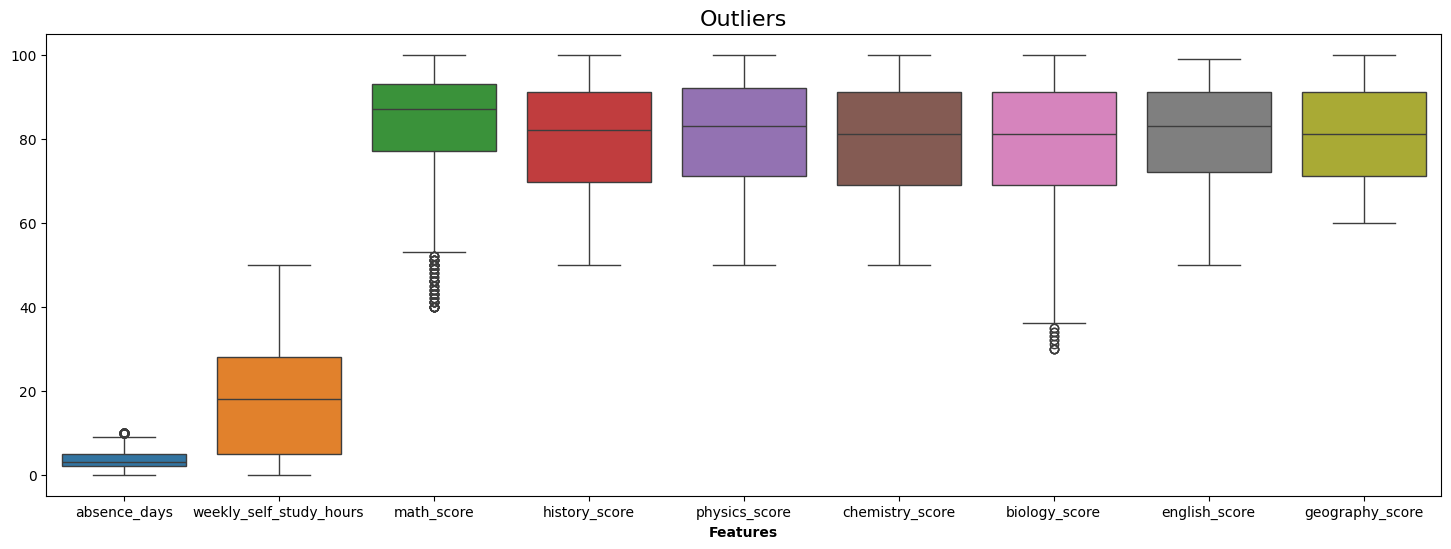

In [ ]:
def show_boxplot(df):
  plt.rcParams['figure.figsize'] = [18,6]
  sns.boxplot(data = df.drop(['id', 'part_time_job', 'extracurricular_activities'], axis=1), orient="v")
  plt.title("Outliers", fontsize = 16)
  plt.xlabel("Features", fontweight = 'bold')

show_boxplot(df)

Outliers are present in the variables absence_days, math_score, and biology_score. However, we will not treat these values in this analysis because such variations are typical in this context, reflecting students with scores above or below average. Therefore, this information can be useful in segmenting student profiles.

## Data Preprocessing

Isolating the features utilized for clustering:

In [ ]:
df.columns

Index(['id', 'first_name', 'last_name', 'email', 'gender', 'part_time_job',
       'absence_days', 'extracurricular_activities', 'weekly_self_study_hours',
       'career_aspiration', 'math_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score', 'english_score', 'geography_score'],
      dtype='object')

In [ ]:
features = df.drop(['id', 'first_name', 'last_name', 'gender', 'email', 'career_aspiration'], axis=1)
features.head()

,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,False,3,False,27,73,81,93,97,63,80,87
1,False,2,False,47,90,86,96,100,90,88,90
2,False,9,True,13,81,97,95,96,65,77,94
3,False,5,False,3,71,74,88,80,89,63,86
4,False,5,False,10,84,77,65,65,80,74,76


Transforming categorical variables:

In [ ]:
features['part_time_job'] = features['part_time_job'].astype(int)
features['extracurricular_activities'] = features['extracurricular_activities'].astype(int)
features.head()

,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,0,3,0,27,73,81,93,97,63,80,87
1,0,2,0,47,90,86,96,100,90,88,90
2,0,9,1,13,81,97,95,96,65,77,94
3,0,5,0,3,71,74,88,80,89,63,86
4,0,5,0,10,84,77,65,65,80,74,76


Checking for skewed data:

In [ ]:
features.skew(numeric_only=True)

part_time_job                 1.876711
absence_days                  0.767021
extracurricular_activities    1.470199
weekly_self_study_hours       0.138065
math_score                   -1.090145
history_score                -0.269966
physics_score                -0.346301
chemistry_score              -0.201933
biology_score                -0.529917
english_score                -0.456268
geography_score              -0.097094
dtype: float64

It is noted that the majority of variables display an almost symmetrical skew, with values close to 0, except for binary variables, which is expected.

Scaling the data:

In [ ]:
scaler = StandardScaler()
features_norm = scaler.fit_transform(features)

In [ ]:
features_norm = pd.DataFrame(data=features_norm, columns=features.columns)
features_norm.head()

,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,-0.433184,-0.253175,-0.506242,0.762334,-0.790525,0.052463,0.930377,1.331147,-1.208673,-0.106245,0.525321
1,-0.433184,-0.633604,-0.506242,2.411605,0.495250,0.445147,1.169682,1.565986,0.759435,0.559086,0.783168
2,-0.433184,2.029397,1.975338,-0.392155,-0.185454,1.309054,1.089913,1.252867,-1.062888,-0.355744,1.126964
3,-0.433184,0.507682,-0.506242,-1.216791,-0.941792,-0.497296,0.531536,0.000391,0.686542,-1.520075,0.439372
4,-0.433184,0.507682,-0.506242,-0.639546,0.041447,-0.261685,-1.303134,-1.173804,0.030506,-0.605244,-0.420119


*T-distributed Stochastic Neighbor Embedding (t-SNE)* is a dimensionality reduction and visualization technique used to map high-dimensional data into two or three-dimensional spaces. This technique effectively preserves local similarities between data points, ensuring that points that are similar in the original feature space remain close to each other in the lower-dimensional space. t-SNE can be utilized to explore and visualize the presence of clusters in the data.

In [ ]:
# n_components: number of dimensions in the space onto which the data is projected
# learning_rate: learning rate (speed at which the algorithm captures proximity)
# n_iter: maximum number of iterations
tsne_transformer = TSNE(n_components=2, learning_rate=0.01, n_iter=2000)
ds_tsne = tsne_transformer.fit_transform(features_norm)

In [ ]:
df_tsne = pd.DataFrame(data=ds_tsne, columns=['component_1', 'component_2'])
df_tsne

,component_1,component_2
0,-1.518437,-0.034611
1,-3.169868,-2.242649
2,1.603231,1.928594
3,1.058055,-0.699632
4,1.485005,0.682658
...,...,...
1995,-1.147644,0.820158
1996,-0.619034,0.204270
1997,-1.327565,1.873134
1998,3.244315,-1.201008


<Axes: xlabel='component_1', ylabel='component_2'>

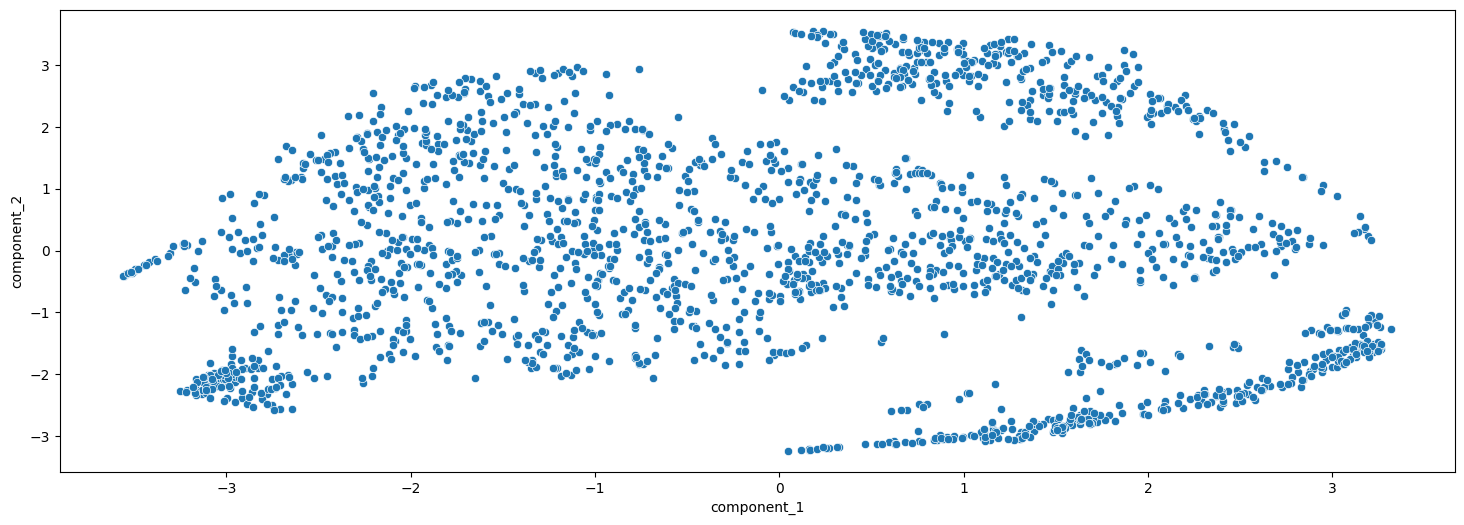

In [ ]:
sns.scatterplot(data = df_tsne, x = 'component_1', y = 'component_2')

The graph above shows some regions with a high density of data points. This suggests the presence of groups of data points that share similar characteristics. Moving forward, we will conduct a clustering analysis using the K-Means algorithm.

## Modeling

In [ ]:
eqs = []
silhouette = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, n_init = 100, random_state=1)
  kmeans.fit(features_norm)
  eqs.append(kmeans.inertia_)
  if i > 1:
    silhouette.append(silhouette_score(features_norm, kmeans.labels_))

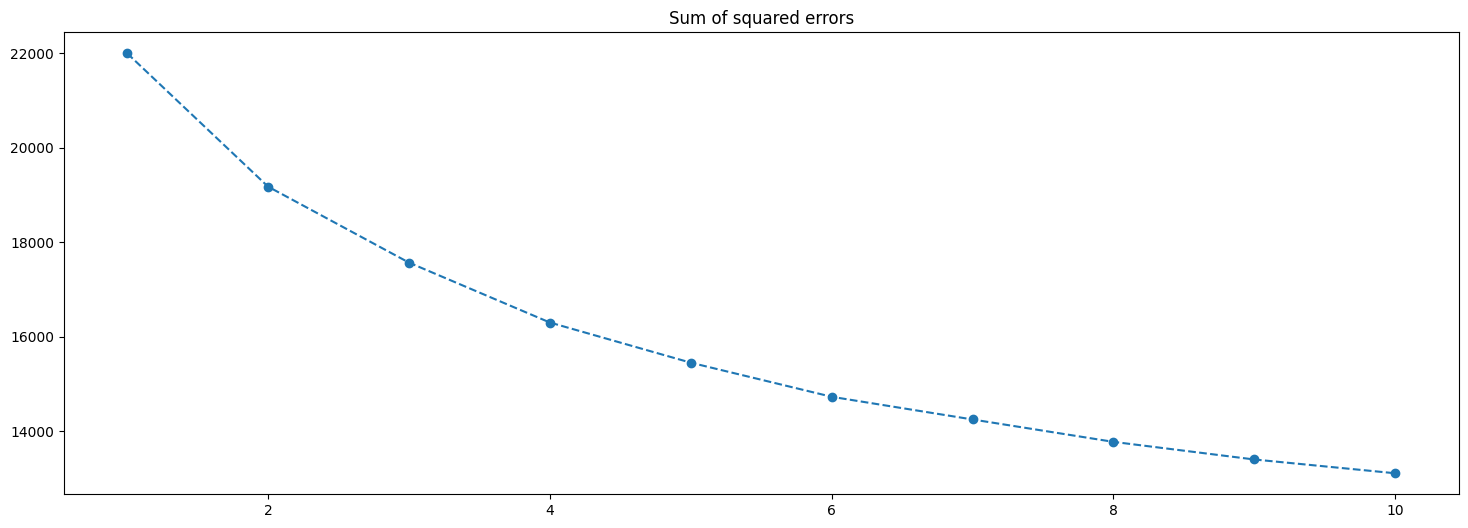

In [ ]:
plt.plot(range(1, 11), eqs, 'o', linestyle='--')
plt.title("Sum of squared errors")
plt.show()

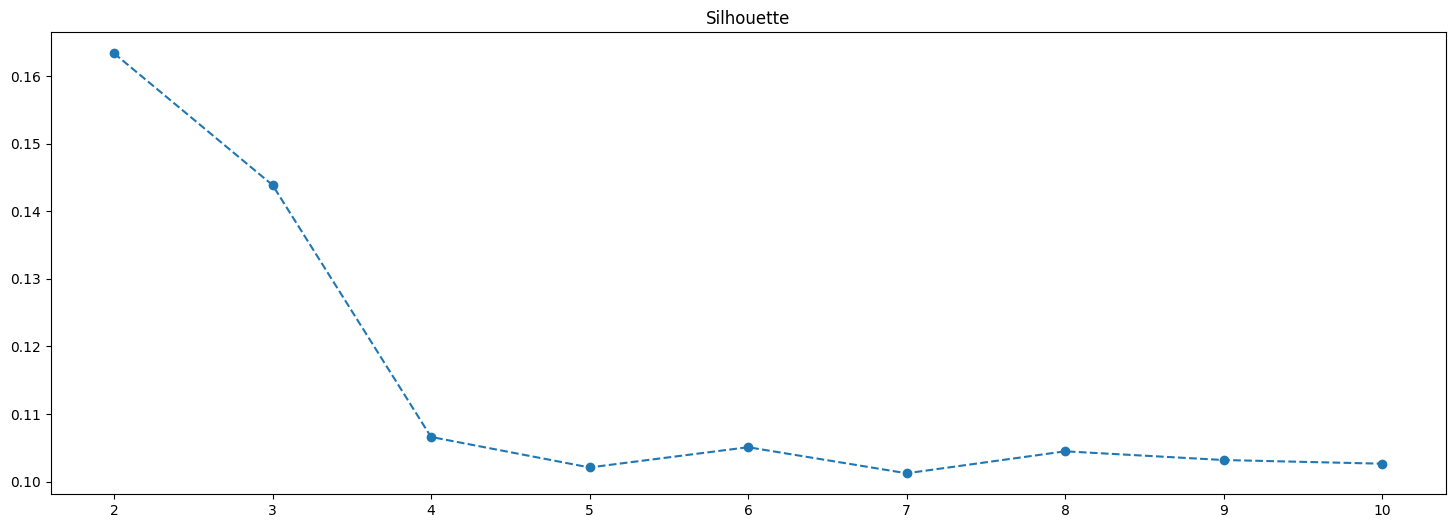

In [ ]:
plt.plot(range(2, 11), silhouette, 'o', linestyle='--')
plt.title("Silhouette")
plt.show()

Based on the plots and previoulsy conducted tests, we will set the number of clusters to 3. Subsequently, we will visualize the distribution of the resulting groups using the plot generated from the t-SNE analysis.

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=100, random_state=1)
kmeans.fit(features_norm)
kmeans.labels_

array([2, 2, 1, ..., 2, 0, 2], dtype=int32)

In [ ]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 477,  358, 1165]))

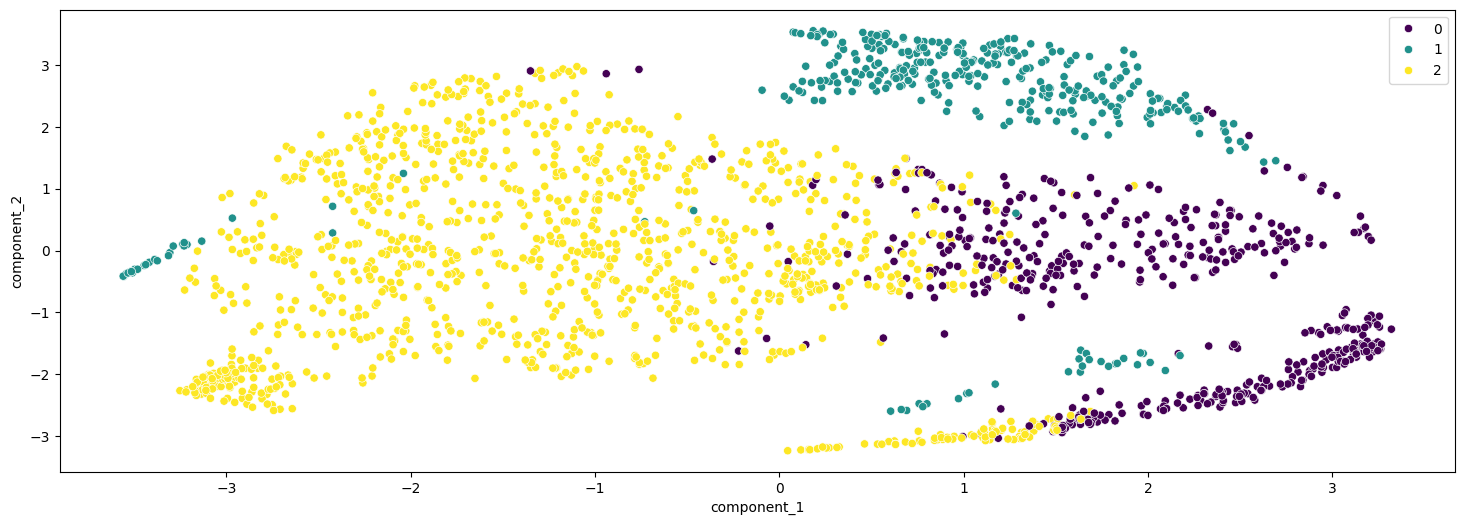

In [ ]:
sns.scatterplot(data = df_tsne, x = 'component_1', y = 'component_2', hue=kmeans.labels_, palette='viridis')
plt.show()

While a few data points appear scattered from their centroids, all three clusters predominantly concentrate their data points around dense regions in space.

## Results and Statistics per Cluster

We will now proceed to analyze the characteristics of each group.

In [ ]:
def showPlot(column, title):
  plt.figure(figsize=(10, 5))
  total = features.groupby('clusters').count()[column].reset_index()
  variable = features[features[column] == 1].groupby('clusters')[column].sum().reset_index()
  variable[column] = [i / j * 100 for i,j in zip(variable[column], total[column])]
  total[column] = [i / j * 100 for i,j in zip(total[column], total[column])]

  bar1 = sns.barplot(x="clusters",  y=column, data=total, color='#A16F8D')

  bar2 = sns.barplot(x="clusters", y=column, data=variable, color='#2D223A')

  top_bar = mpatches.Patch(label='No', color='#A16F8D')
  bottom_bar = mpatches.Patch(label='Yes', color='#2D223A')

  plt.title(title)
  plt.legend(handles=[top_bar, bottom_bar])

  plt.show()

Summarizing statistics per variable:

In [ ]:
cluster_labels = np.array([x + 1 for x in kmeans.labels_])
features['clusters'] = cluster_labels

In [ ]:
for col in features.columns.tolist():
  if col != 'clusters':
    print(f'{col}:')
    print(features.groupby(['clusters'])[col].describe().T)
    print(' ')

part_time_job:
clusters           1           2            3
count     477.000000  358.000000  1165.000000
mean        0.429769    0.081006     0.070386
std         0.495563    0.273226     0.255907
min         0.000000    0.000000     0.000000
25%         0.000000    0.000000     0.000000
50%         0.000000    0.000000     0.000000
75%         1.000000    0.000000     0.000000
max         1.000000    1.000000     1.000000
 
absence_days:
clusters           1           2            3
count     477.000000  358.000000  1165.000000
mean        5.909853    3.365922     2.838627
std         2.861334    2.322141     2.023416
min         0.000000    0.000000     0.000000
25%         4.000000    2.000000     1.000000
50%         6.000000    3.000000     2.000000
75%         8.000000    5.000000     4.000000
max        10.000000   10.000000    10.000000
 
extracurricular_activities:
clusters           1      2       3
count     477.000000  358.0  1165.0
mean        0.104822    1.0     0.0
std

### Part-time Job

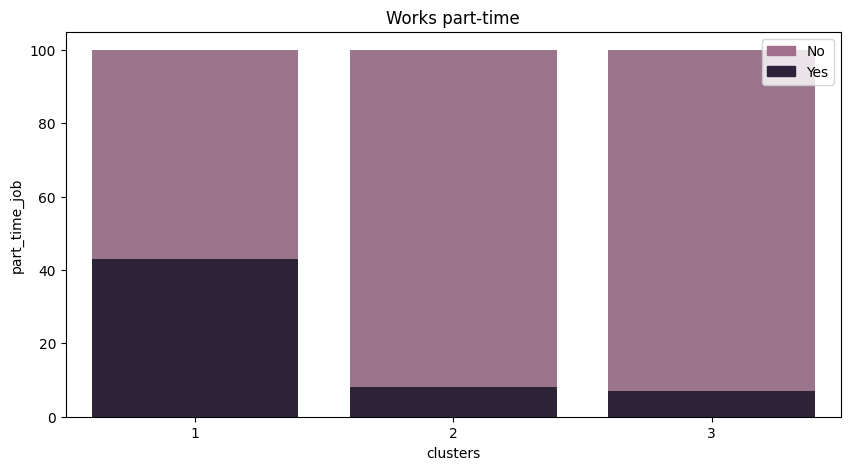

In [ ]:
showPlot('part_time_job', 'Works part-time')

For this variable, it is observed that group 1 comprises the majority of students engaged in part-time work. Conversely, in the other groups, such students constitute the minority.

### Extracurricular Activities

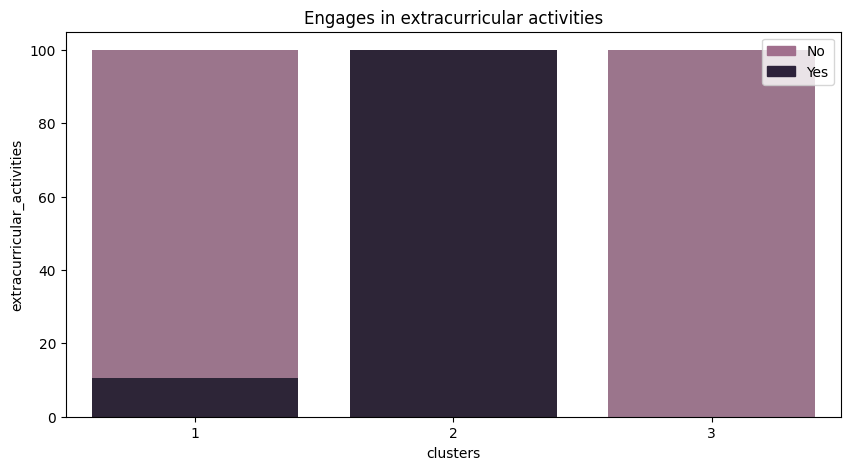

In [ ]:
showPlot('extracurricular_activities', 'Engages in extracurricular activities')

Concerning extracurricular activities, only a small portion of students in group 1 participate in such activities. In contrast, in group 2, all students are involved in some form of extracurricular activity, whereas in group 3, none of the students participate in any extracurricular activities.

### Grades and Study Hours

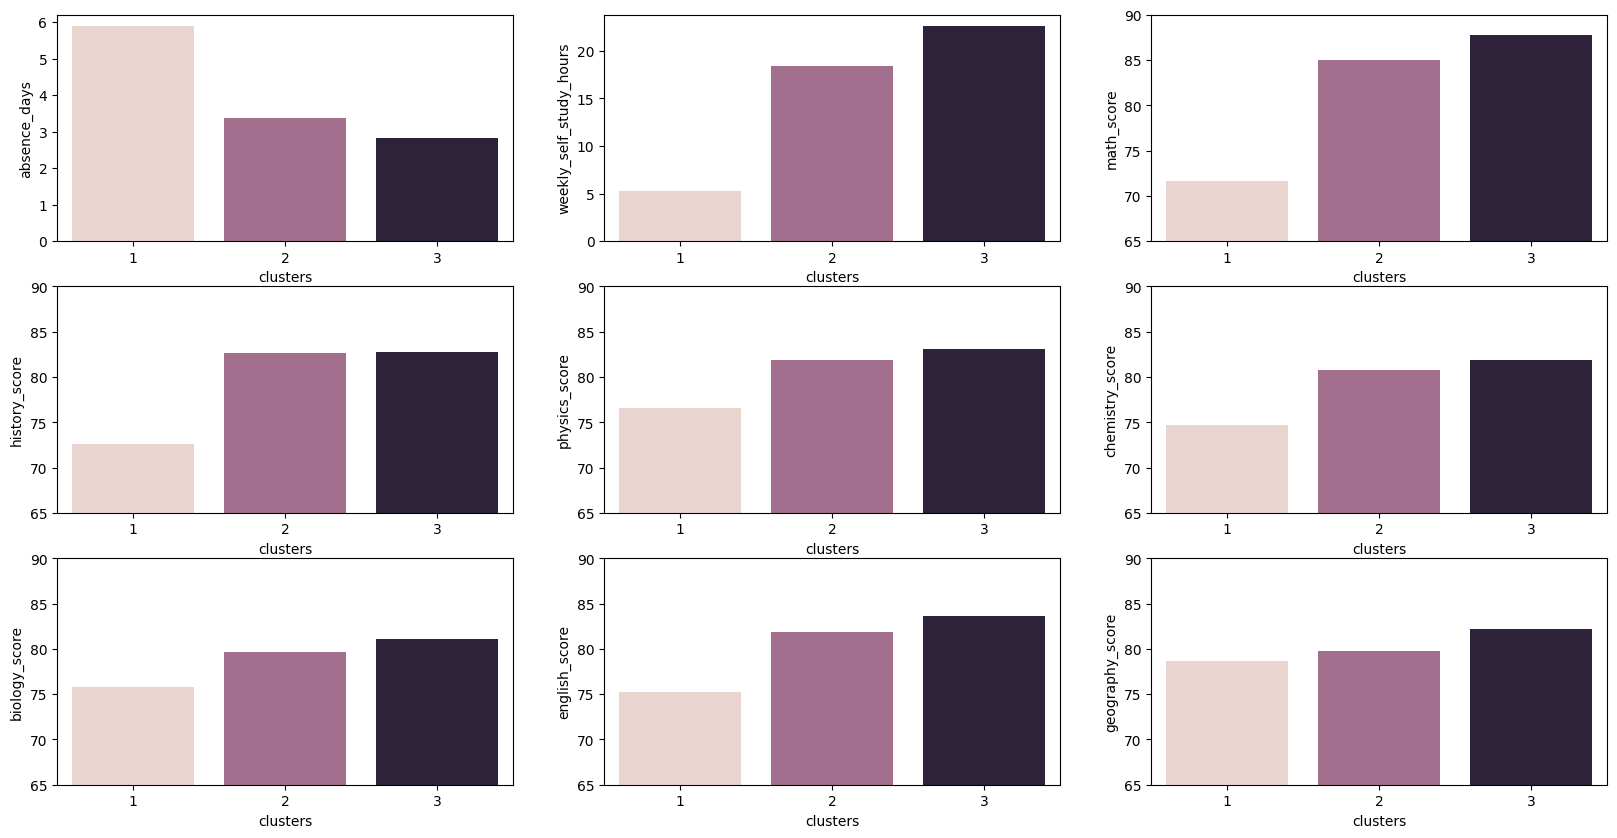

In [ ]:
columns = ['absence_days', 'weekly_self_study_hours', 'math_score', 'history_score',
       'physics_score', 'chemistry_score', 'biology_score', 'english_score',
       'geography_score']
figure, axis = plt.subplots(3, 3, figsize=(20, 10))
k = 0
for i in range(3):
  for j in range(3):
    if columns[k][-6:] == '_score':
      axis[i, j].set(ylim=(65, 90))
    sns.barplot(ax=axis[i, j], x="clusters", y=columns[k], data=features, hue='clusters', errorbar=None, legend=False)
    k += 1
plt.show()

**Group 1:**

On average, students in group 1 exhibit higher rates of absenteeism and notably fewer study hours per week compared to students in other groups. This trend reflects in their relatively lower academic performance across all subjects. As observed previously, approximately half of the students in this group hold part-time jobs, and a fraction are involved in extracurricular activities. Consequently, these students encounter greater challenges in balancing their academic pursuits with other commitments.

**Group 2:**

In group 2, where all students participate in extracurricular activities, academic performance falls somewhere between group 1 and group 3 but leans closer to the latter. The level of dedication among students in this group, as evidenced by study hours and absence rates, is moderately higher than that of group 1 yet lower than that of group 3.

**Group 3:**

Group 3 comprises the smallest proportion of students engaged in part-time employment, with none participating in extracurricular activities. Notably, students in this group exhibit significantly higher average study hours per week, fewer absentee days, and consistently higher grades across all subjects compared to the other groups.


## Supervised Learning

Next, a model will be trained to classify students into the previously identified groups.

In [ ]:
features.head()

,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,clusters
0,0,3,0,27,73,81,93,97,63,80,87,3
1,0,2,0,47,90,86,96,100,90,88,90,3
2,0,9,1,13,81,97,95,96,65,77,94,2
3,0,5,0,3,71,74,88,80,89,63,86,1
4,0,5,0,10,84,77,65,65,80,74,76,1


Separating the features from the target variable:

In [ ]:
X = features.drop('clusters', axis=1)
X.head()

,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,0,3,0,27,73,81,93,97,63,80,87
1,0,2,0,47,90,86,96,100,90,88,90
2,0,9,1,13,81,97,95,96,65,77,94
3,0,5,0,3,71,74,88,80,89,63,86
4,0,5,0,10,84,77,65,65,80,74,76


In [ ]:
y = features.clusters
y

0       3
1       3
2       2
3       1
4       1
       ..
1995    3
1996    3
1997    3
1998    1
1999    3
Name: clusters, Length: 2000, dtype: int64

Splitting the dataset into training and test sets:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Tuning the parameters:

In [ ]:
skf = StratifiedKFold(5)
folds = skf.split(X_train, y_train)
folds_list = list(folds)

In [ ]:
rf_params = {'model__n_estimators': [100, 200],
             'model__max_depth': [10, 20, None],
             'model__min_samples_leaf': [1, 5, 15, 20]}

rf_pipe = Pipeline(steps = [('scaler', StandardScaler()),
                            ('model', RandomForestClassifier())])

rf_search = GridSearchCV(rf_pipe, rf_params, cv = folds_list, scoring='accuracy', n_jobs=-1)

rf_search.fit(X_train, y_train)
print(rf_search.best_score_)
print(rf_search.best_params_)

0.94375
{'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__n_estimators': 200}


Fitting the model:

In [ ]:
rf = rf_search.best_estimator_
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

Analyzing the results:

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.81      0.88       103
           2       1.00      0.99      0.99        78
           3       0.92      1.00      0.95       219

    accuracy                           0.94       400
   macro avg       0.96      0.93      0.94       400
weighted avg       0.95      0.94      0.94       400



In [ ]:
cross_val_score(rf, X_train, y_train, cv=folds_list)

array([0.946875, 0.953125, 0.95625 , 0.9375  , 0.934375])

<Figure size 1000x1000 with 0 Axes>

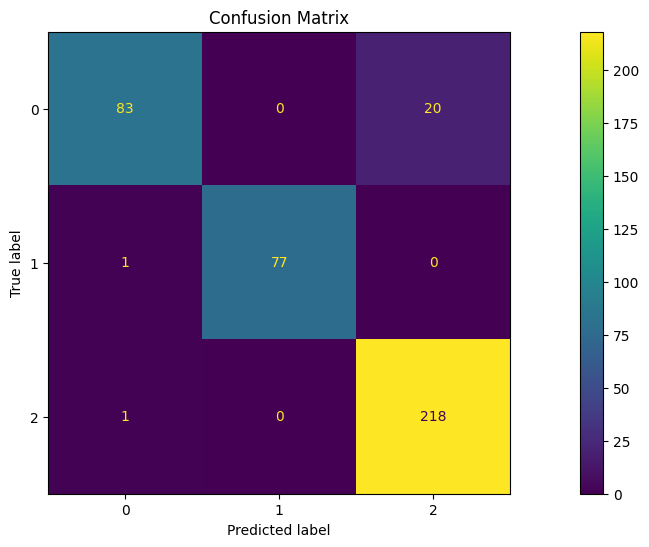

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cd = ConfusionMatrixDisplay(confusion_matrix = cm)

plt.figure(figsize=(10, 10))
cd.plot()
plt.title("Confusion Matrix")
plt.show()

The model demonstrates excellent performance in distinguishing the three groups, as evidenced by satisfactory training and test metrics, with no signs of overfitting.